In [1]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import pyCalc as p
import random
import math
p.setMode("quiet")

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

X = np.vstack([img.reshape(-1,) for img in mnist.train.images])
y = mnist.train.labels[:5000]
y.setflags(write=1)
del mnist

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
y

array([7, 3, 4, ..., 6, 9, 7], dtype=uint8)

In [4]:
for i in range(len(y)):
    if y[i] in {1,3,5,7,9}:
        y[i]=1
    else:
        y[i]=0
        
y=y.reshape(5000,1)

In [5]:
y.shape

(5000, 1)

In [6]:
xs = p.constant(np.array(X[:5000], dtype=float)) #55000x784
ys = p.constant(np.array(y.T, dtype=float)) #55000x1

In [7]:
weights =2*np.random.random((784,1)) - 1
ws = p.var("independent", 784,1)

In [8]:
l0 = p.function(xs,ws, "*") #55000x1
l1 = p.function(l0, "sigmoid") #55000x1
l1_error = p.function(ys, l1, "-")#55000x1


sig = p.function(l1, "sigmoid_r")
l1_delta = p.function(sig, l1_error, "colwise*")
tmp = p.function(xs.T(),l1_delta, "*")


csh= []
wsh = []
outs =[]

Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: colwise* >left is a 5000x1 matrix but right is a 5000x1 matrix


In [9]:
for i in range(200):
    weights = weights + tmp.value(dict([(ws,weights)]))
    if i%10:
        print(i,"     ", np.sum(l1_error.value()))
    csh.append(np.sum(l1_error.value()))

1       -1503.56210627
2       -1440.13207805
3       -1346.66579434
4       -1260.1069736
5       -1239.15922052
6       -1158.04186402
7       -1088.03082308
8       -950.013685477
9       -911.531162456
11       -940.819660185
12       -959.239864605
13       -932.668476763
14       -949.57649475
15       -890.788154892
16       -878.137725964
17       -878.567278343
18       -856.027248913
19       -804.625429578
21       -776.489114936
22       -657.703499803
23       -683.81033433
24       -603.454002408
25       -628.569589234
26       -550.862215099
27       -543.686260209
28       -385.029447085
29       -455.754211179
31       -488.429799992
32       -541.90883478
33       -526.494275544
34       -557.306617726
35       -364.16419763
36       -394.74628812
37       -419.58263669
38       -505.948477381
39       -478.879799348
41       -445.498774584
42       -519.104641582
43       -448.495291118
44       -413.263613379
45       -423.831494244
46       -384.754939068
47      

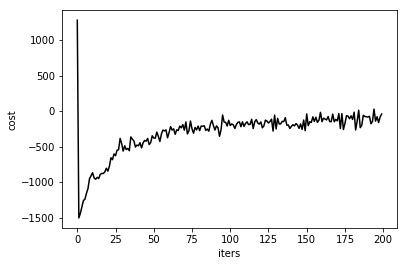

In [10]:
import matplotlib.pyplot as plt
x_data = [i for i in range(len(csh))]
plt.figure(1)
plt.subplot(111)
plt.ylabel('cost')
plt.xlabel('iters')
plt.plot(x_data, csh, 'k')
plt.show()

In [11]:
csh

[1277.4501215680207,
 -1503.5621062736291,
 -1440.1320780532683,
 -1346.6657943433479,
 -1260.1069736047548,
 -1239.1592205179932,
 -1158.0418640174451,
 -1088.0308230837613,
 -950.01368547699917,
 -911.53116245567924,
 -868.05758671178705,
 -940.81966018476908,
 -959.23986460462368,
 -932.66847676278212,
 -949.57649474963807,
 -890.78815489169233,
 -878.13772596371496,
 -878.56727834336698,
 -856.02724891291155,
 -804.62542957837866,
 -845.78275268547623,
 -776.48911493587536,
 -657.70349980297942,
 -683.81033433049652,
 -603.45400240819436,
 -628.56958923406307,
 -550.86221509905135,
 -543.68626020939303,
 -385.02944708528844,
 -455.75421117922883,
 -563.37156383549359,
 -488.42979999206801,
 -541.90883478009118,
 -526.49427554412989,
 -557.30661772608232,
 -364.16419763003125,
 -394.74628812033694,
 -419.58263669030362,
 -505.94847738099634,
 -478.87979934813188,
 -488.05936889399095,
 -445.49877458413414,
 -519.10464158179059,
 -448.49529111849722,
 -413.26361337895162,
 -423.83149

In [12]:
l1.value(dict([(ws,weights)]))

array([[  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       ..., 
       [  1.25175997e-41],
       [  1.00000000e+00],
       [  1.00000000e+00]])

In [13]:
xs.value().shape

(5000, 784)

In [14]:
ys.value()

array([[ 1.],
       [ 1.],
       [ 0.],
       ..., 
       [ 0.],
       [ 1.],
       [ 1.]])

In [15]:
l1_error.value()

array([[  0.00000000e+00],
       [  0.00000000e+00],
       [ -1.00000000e+00],
       ..., 
       [ -1.25175997e-41],
       [  0.00000000e+00],
       [  0.00000000e+00]])

In [16]:
tmp.value(dict([(ws,weights)]))

array([[  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000e+000],
       [  0.00000000

In [17]:
yy=ys.value()
hh=l1.value()
cor=0
for i in range(len(yy)):
    if yy[i]==0 and hh[i]<0.5:
        cor+=1
    elif yy[i]==1 and hh[i]>0.5:
        cor+=1
print (100*cor/len(yy))
    
    

87.02
